#### These techs are based on the book *Deep Learning with Python*.

In [1]:
import numpy as np
import pandas as pd
import keras 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# load data, and simply norm
raw_data = pd.read_csv("../dataset/MNIST/train.csv")
data = raw_data.iloc[:,1:].values
labels = keras.utils.to_categorical(raw_data["label"])
train_images, test_images, train_labels, test_labels = train_test_split(data, labels)
train_images = train_images / 255
test_images = test_images / 255

### Naive Conv Layer

In [3]:
# first reshape images to 2D image
train_images = train_images.reshape(train_images.shape[0], 28, 28, -1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, -1)
print(train_images.shape, test_images.shape)

(31500, 28, 28, 1) (10500, 28, 28, 1)


In [53]:
def naive_conv(input_shape=(28, 28, 1)):
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [54]:
# hyper params
epochs = 20
batch_size = 128

In [ ]:
naive_conv = naive_conv()
naive_hist = naive_conv.fit(train_images, train_labels, epochs=epochs,
                           batch_size=batch_size)

In [21]:
_, acc = naive_conv.evaluate(test_images, test_labels)
print(acc)

10500/10500 [==============================] - 1s 109us/step
0.9911428571428571


Because MNIST dataset is too simple for CNN, we extract only 2000 samples for training and 1000 for testing.

In [4]:
small_train_images = train_images[:2000]
small_test_images = test_images[:1000]
small_train_labels = train_labels[:2000]
small_test_labels = test_labels[:1000]

### Data Augmentation 

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1,
                            shear_range=0.1, zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow(small_train_images, small_train_labels, 
                                     batch_size=64)

(28, 28, 1)


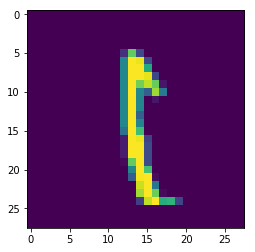

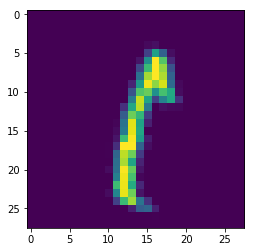

In [52]:
# visualize augmented image
vis_image = small_train_images[0]
plt.figure(1)
plt.imshow(vis_image.reshape(28, 28))
print(vis_image.shape)
transform_parameters = {'theta':20}
rotated_image = ImageDataGenerator().apply_transform(vis_image,transform_parameters=transform_parameters)
plt.figure(2)
plt.imshow(rotated_image.reshape(28, 28))
plt.show()

In [ ]:
aug_model = naive_conv()
aug_history = aug_model.fit_generator(train_generator, steps_per_epoch=
                                     small_train_images.shape[0]//64,
                                     epochs=100)

In [28]:
_, aug_acc = aug_model.evaluate(test_images, test_labels)
print(aug_acc)

10500/10500 [==============================] - 1s 61us/step
0.9745714285714285


In [ ]:
nav_model = naive_conv()
naiv_history = nav_model.fit(small_train_images, small_train_labels, epochs=100, 
                            batch_size=64, validation_split=0.2)

In [25]:
_, nav_acc = nav_model.evaluate(test_images, test_labels)
print(nav_acc)

10500/10500 [==============================] - 1s 98us/step
0.9654285714285714
